In [27]:
# Load neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [28]:
# Load the dataset
file_path = "D:/Assignments/imdb_movie_dataset (2).csv"  
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [29]:
# Remove the target labels and text columns that are not used for clustering.
# Here we drop 'Rating' and other non-numeric columns.
df_clustering = df.drop(columns=['Rating', 'Title', 'Genre', 'Description', 'Director', 'Actors'], errors='ignore')

# Drop rows with any missing values
df_clustering = df_clustering.dropna()

In [30]:
# Feature Selection and Scaling
# ===============================

# At this point, df_clustering should contain only numeric columns (e.g., Rank, Year, Runtime, Votes, Revenue, Metascore)
print("Columns used for clustering:", df_clustering.columns.tolist())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

Columns used for clustering: ['Rank', 'Year', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore']


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

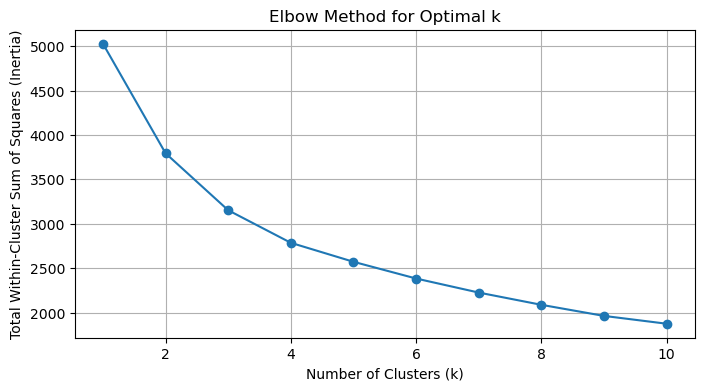

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
# Apply KMeans Clustering
# ===============================

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    km_temp = KMeans(n_clusters=k, random_state=42)
    km_temp.fit(X_scaled)
    inertia.append(km_temp.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the elbow plot, choose an optimal k (for example, k = 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the cleaned DataFrame
df_clustering['Cluster'] = clusters


In [32]:
# Clustering Evaluation
# ===============================

# Compute Silhouette Coefficient to evaluate clustering quality
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Coefficient:", silhouette_avg)

# Total within-cluster sum of squares is given by inertia
total_inertia = kmeans.inertia_
print("Total within-cluster sum of squares (Inertia):", total_inertia)


Silhouette Coefficient: 0.2039677820810192
Total within-cluster sum of squares (Inertia): 3152.2049779908284


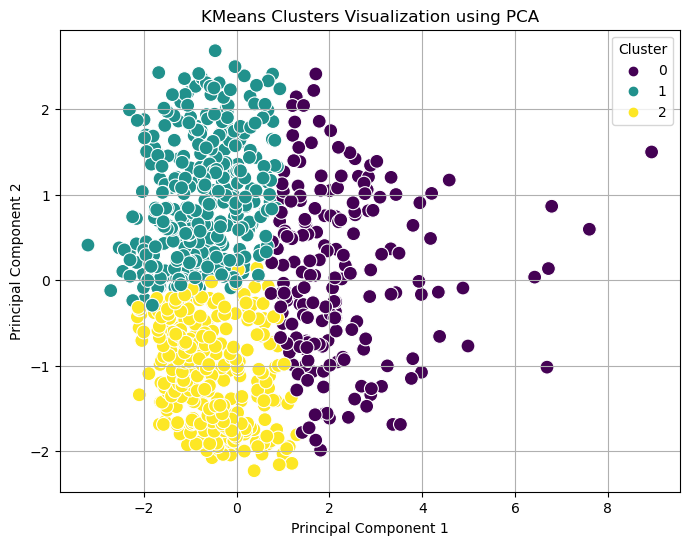

In [33]:
# Visualize Clusters using PCA
# ===============================

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clustering['Cluster'], palette='viridis', s=100)
plt.title("KMeans Clusters Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()